From time to time, Jeremy organizes live coding session.

They are recorded (~1h each) and he takes one subject, and tackle it. They seem to be for beginners. But I am quite sure I can get some tips that I will write down on this page.

18 sessions so far (jan-23):

[Live-coding (aka walk-thrus) ✅ - Part 1 2022 - fast.ai Course Forums](https://forums.fast.ai/t/live-coding-aka-walk-thrus/96617)

> -   [Live-coding 1](https://forums.fast.ai/t/walk-thru-1/96649)
> -   [Live-coding 2](https://forums.fast.ai/t/walk-thru-2/96690)
> -   [Live-coding 3](https://forums.fast.ai/t/walk-thru-3/96707)
> -   [Live-coding 4](https://forums.fast.ai/t/walk-thru-4/96727)
> -   [Live-coding 5](https://forums.fast.ai/t/walk-thru-5/96733)
> -   [Live-coding 6](https://forums.fast.ai/t/walk-thru-6/96794)
> -   [Live-coding 7](https://forums.fast.ai/t/walk-thru-7/96811)
> -   [Live-coding 8](https://forums.fast.ai/t/walk-thru-8/96825)
> -   [Live-coding 9](https://forums.fast.ai/t/session-9/96847)
> -   [Live-coding 10](https://forums.fast.ai/t/session-10/96874)
> -   [Live-coding 11](https://forums.fast.ai/t/session-11/96891)
> -   [Live-coding 12](https://forums.fast.ai/t/session-12/96909)
> -   [Live-coding 13](https://forums.fast.ai/t/session-13/96924)
> -   [Live-coding 14](https://forums.fast.ai/t/walk-thru-14/97011)
> -   [Live-coding 15](https://forums.fast.ai/t/walk-thru-15/97024)
> -   [Live-coding 16](https://forums.fast.ai/t/session-16/97059)
> -   [Live-coding 17](https://forums.fast.ai/t/live-coding-17/97166)
> -   [Live-coding 18](https://forums.fast.ai/t/live-coding-18/97187)


# Live coding 1

- [Live-coding 1 - forum entry](https://forums.fast.ai/t/walk-thru-1/96649)
- [Live-coding 1 - video](https://www.youtube.com/watch?v=56sIyFjihEc)

## start from a fresh user in WSL

I try things with a complete fresh new user `fastai` in WSL

```bash
sudo adduser --gecos "" fastai
sudo usermod -aG sudo,adm fastai
su - fastai
```


In [1]:
!id fastai

uid=1001(fastai) gid=1001(fastai) groups=1001(fastai),4(adm),27(sudo)


if needed, completey delete user and home directory

```bash
sudo userdel -rfRZ fastai
```

### and setup things for this new user

#### X apps

To launch X apps

```bash
pushd ~
tee -a .bashrc << EOF
export DISPLAY=":0"
EOF
popd
```

Alias `terminal` `explorer (nautilus)`

```bash
pushd ~
tee -a .bash_aliases << EOF
alias terminal='dbus-launch gnome-terminal &'
alias explorer='dbus-launch nautilus &'
EOF
popd
```

Take it into account
```bash
pushd ~
source .bashrc
popd
```

Update Ctrl-C Ctrl-V shortcuts in gnome-terminal

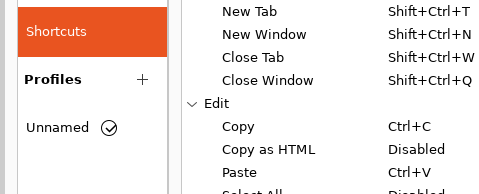

#### SSL, CA, SSH setups

To avoid "unsafe legacy renegotiation disabled" (linked to my corporate network architecture)

and "SSL peer certificate or SSH remote key was not OK"

```bash
pushd ~
tee -a .bashrc << EOF
export OPENSSL_CONF=/etc/ssl/openssl.cnf
export REQUESTS_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
EOF
source .bashrc
popd
```

To connect to gitlab

Not the smartest way to do it but I copy ssh keys from my main user

```bash
sudo bash -c "cp ~guillaume/.ssh/id_rsa* ~fastai/.ssh/"
sudo bash -c "chown fastai:fastai ~fastai/.ssh/*"
```

## install python distribution - mambaforge | the manual way

This is from https://github.com/conda-forge/miniforge#mambaforge

Mambaforge is miniforge but with mamba already setup.



```bash
pushd ~/downloads
bash Mambaforge-Linux-x86_64.sh
popd
```

And to this question
> Do you wish the installer to initialize Mambaforge
by running conda init? [yes|no]

We answer Yes, and then 

> ==> For changes to take effect, close and re-open your current shell. <==

Jeremy hates to not automate things you could have to do several times.

To do it we revert everything done here manually (including conda-init in .bashrc)

## about python version

by searching for `python eol`, you fall into https://endoflife.date/python

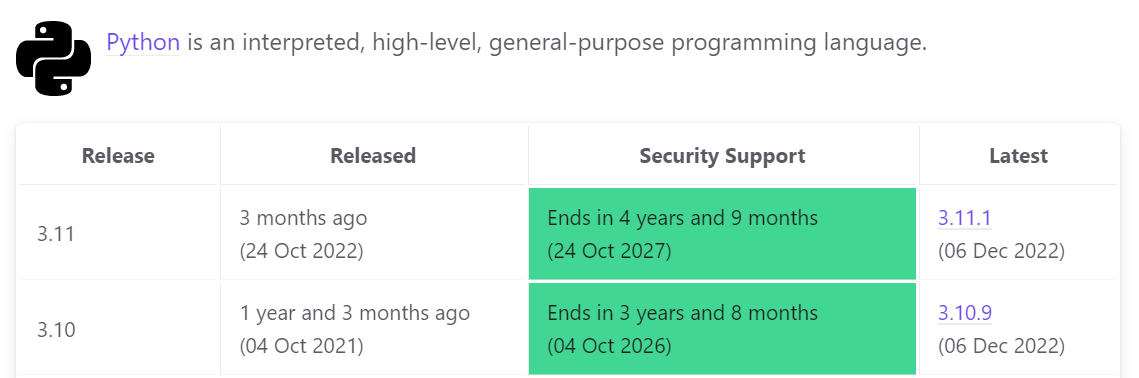

and recommandation from Jeremy is to take penultimate one. It looks like ot is what is followed by mambaforge

## install python distribution - mambaforge | the automated way

It is at https://github.com/fastai/fastsetup

It is Jeremy's repo that contains anything he uses to setup a new computer

There is a thing called `setup-conda.sh`

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/fastai/fastsetup/master/setup-conda.sh | bash
```

and run `mamba init` to allow mamba activate

## and then activate self-certificates into CA

Setup pip, instal certifi and update CA

```bash
pushd ~
# setup pip
mkdir -p ~/.config/pip
tee ~/.config/pip/pip.conf << EOF
[global]
timeout = 1000
index-url = https://pypi.org/simple/
trusted-host = download.pytorch.org
               pypi.python.org
               files.pythonhosted.org
               pypi.org
               artifactory.michelin.com
extra-index-url= https://artifactory.michelin.com/api/pypi/pypi/simple
EOF
# install certifi
pip install -U certifi
export SSL_CERT_FILE=`python -c 'import certifi;print(certifi.where())'`
# update CA
export TMPDIR=`mktemp -d`
git clone git@gitlab.michelin.com:DEV/bib-certificates.git $TMPDIR
cd $TMPDIR
cat *trust-ca.pem >> $SSL_CERT_FILE
cd
# export SSL_CERT_FILE
tee -a ~.bashrc << EOF
export SSL_CERT_FILE=`python -c 'import certifi;print(certifi.where())'`
EOF
source ~.bashrc
popd
```

## install packages in base

### ipython

```bash
mamba install ipython
```


Here Jeremy mentionned that Wes McKinney, author of "Python for Data Analysis" does much much things in ipython.

And this is worthy to be read

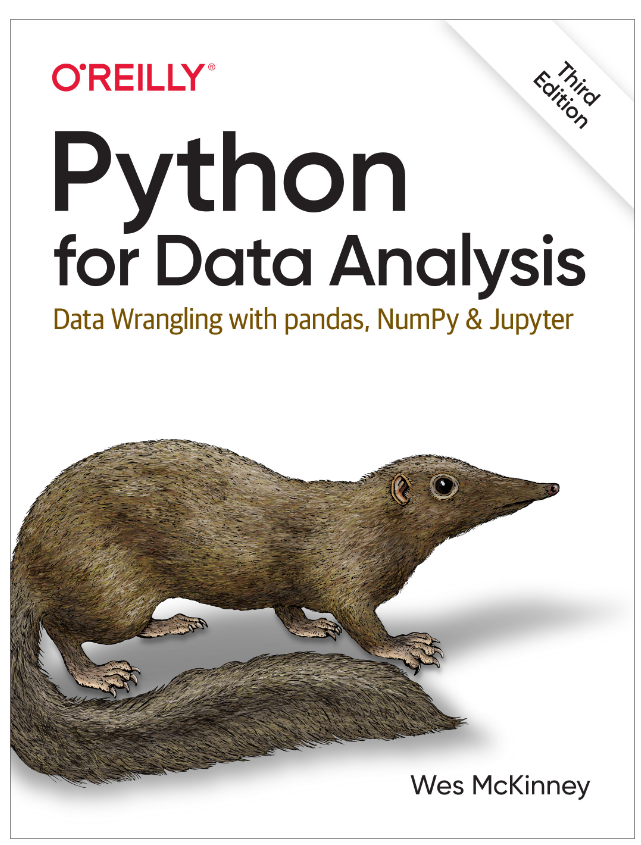

### pytorch

Let's install pytorch (searching pytorch install) https://pytorch.org/get-started/locally/

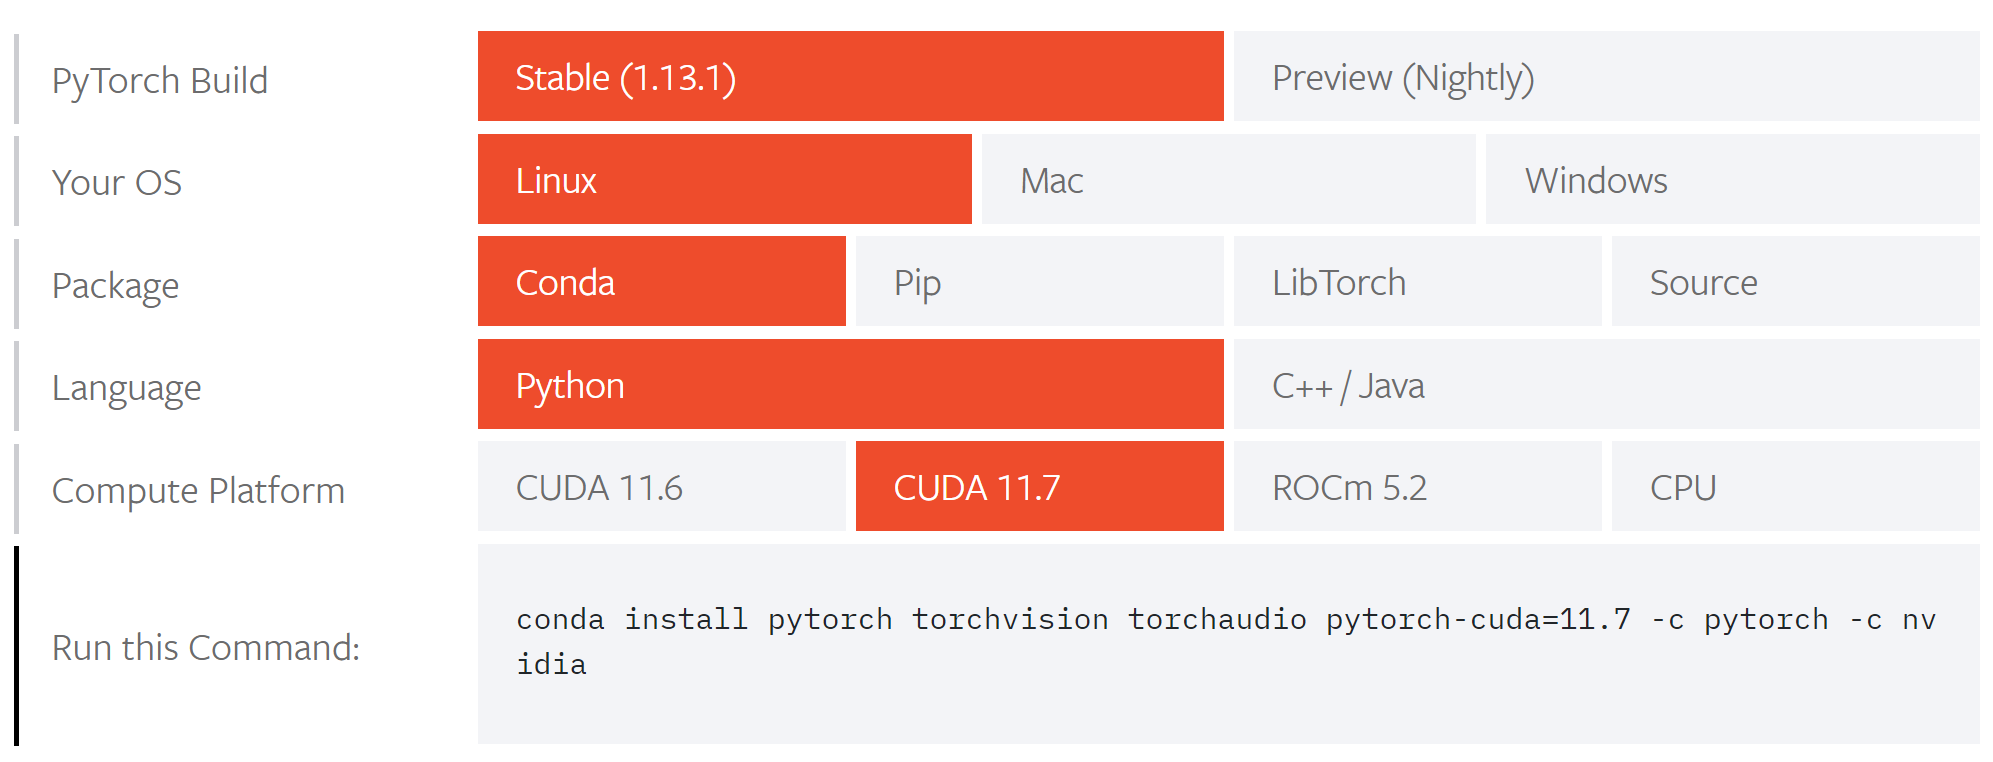

```bash
mamba install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia
```

from ipython we can test

```python
In [2]: torch.cuda.get_device_name()
Out[2]: 'NVIDIA GeForce RTX 3080 Laptop GPU'
```

### jupyter

Let's install jupyter (searching jupyter lab install) https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html

Because we use mamba, conda-forge channel is the default so

```bash
mamba install jupyterlab
```

And we can test by running it `jupyter lab`

Because I have firefox installed in WSL, I don't have the same issue Jeremy mentionned. And because I have another instance of jupyter running under my main user (where I blog this), it opens on port 8889



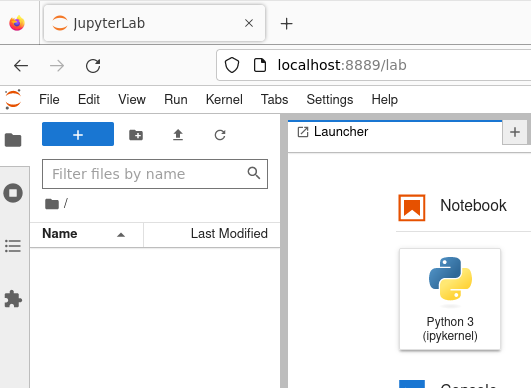

### ipywidgets

```bash
mamba install ipywidgets
```

## End of session - wrap-up

This was the base environnement setup after installing mambaforge

`conda_env/base.txt`

```bash
pip install -U certifi
export SSL_CERT_FILE=`python -c 'import certifi;print(certifi.where())'`
# update CA
export TMPDIR=`mktemp -d`
git clone git@gitlab.michelin.com:DEV/bib-certificates.git $TMPDIR
pushd $TMPDIR
cat *trust-ca.pem >> $SSL_CERT_FILE
popd

mamba install ipython

mamba install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

mamba install jupyterlab ipywidgets
```

Starting from this fresh install, let's retest stable diffusion and my [issues on WSL](/posts/2023-01-12-fastai-stable-diffusion.html#under-wsl): 

```bash
mamba create --name fastai_diffusers --clone base
mamba activate fastai_diffusers
pip install -Uq diffusers transformers fastcore
mamba install matplotlib
cd ~/nbs
git clone https://github.com/fastai/diffusion-nbs.git
jupyter lab
```

and open/run `stable_diffusion.ipynb`

but this is not better (still on cuda 1.7, this is maybe why)

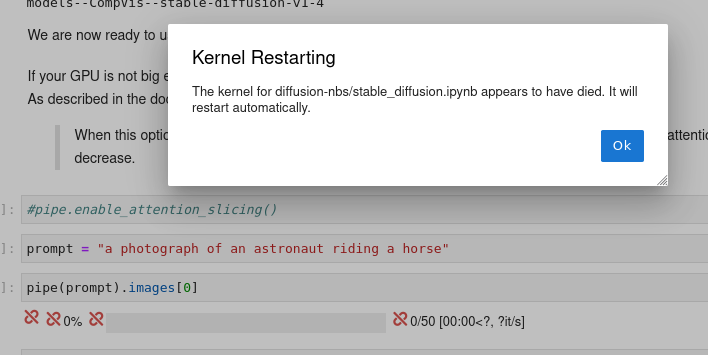

# Live coding 2

- [Live-coding 2 - forum entry](https://forums.fast.ai/t/live-coding-2/96690)
- [Live-coding 2 - video](https://www.youtube.com/watch?v=0pWjZByJ3Lk)

Jeremy shows stuff such as:
- switchi users in Linux, 
- introduction to git and github
- build a website with github
- setup and use ssh keys
- use tmux
- create a notebook in jupyter lab
- committing and pushing to git
- fork a repo
- install fastai and fastbook

## tmux

This is a little bit as `screen`

**installation**

`sudo snap install tmux --classic`


**usage**

just run `tmux` to start a new window.

From here you have special commands, starting with binding key (default is Ctrl-b)

Start a new pan (vertical split): `C-b %`

Start a new pan (horizontal split): `C-b "`

Close a pan: `C-d`

Navigate through pans: `C-b arrow keys`

Zoom-in zoom-out: `C-b z`

Detach window: `C-b d`

Navigate in scrillback buffer: `C-b [` then arrow keys, pg-up, pg-down

Re-attach window: `tmux a`

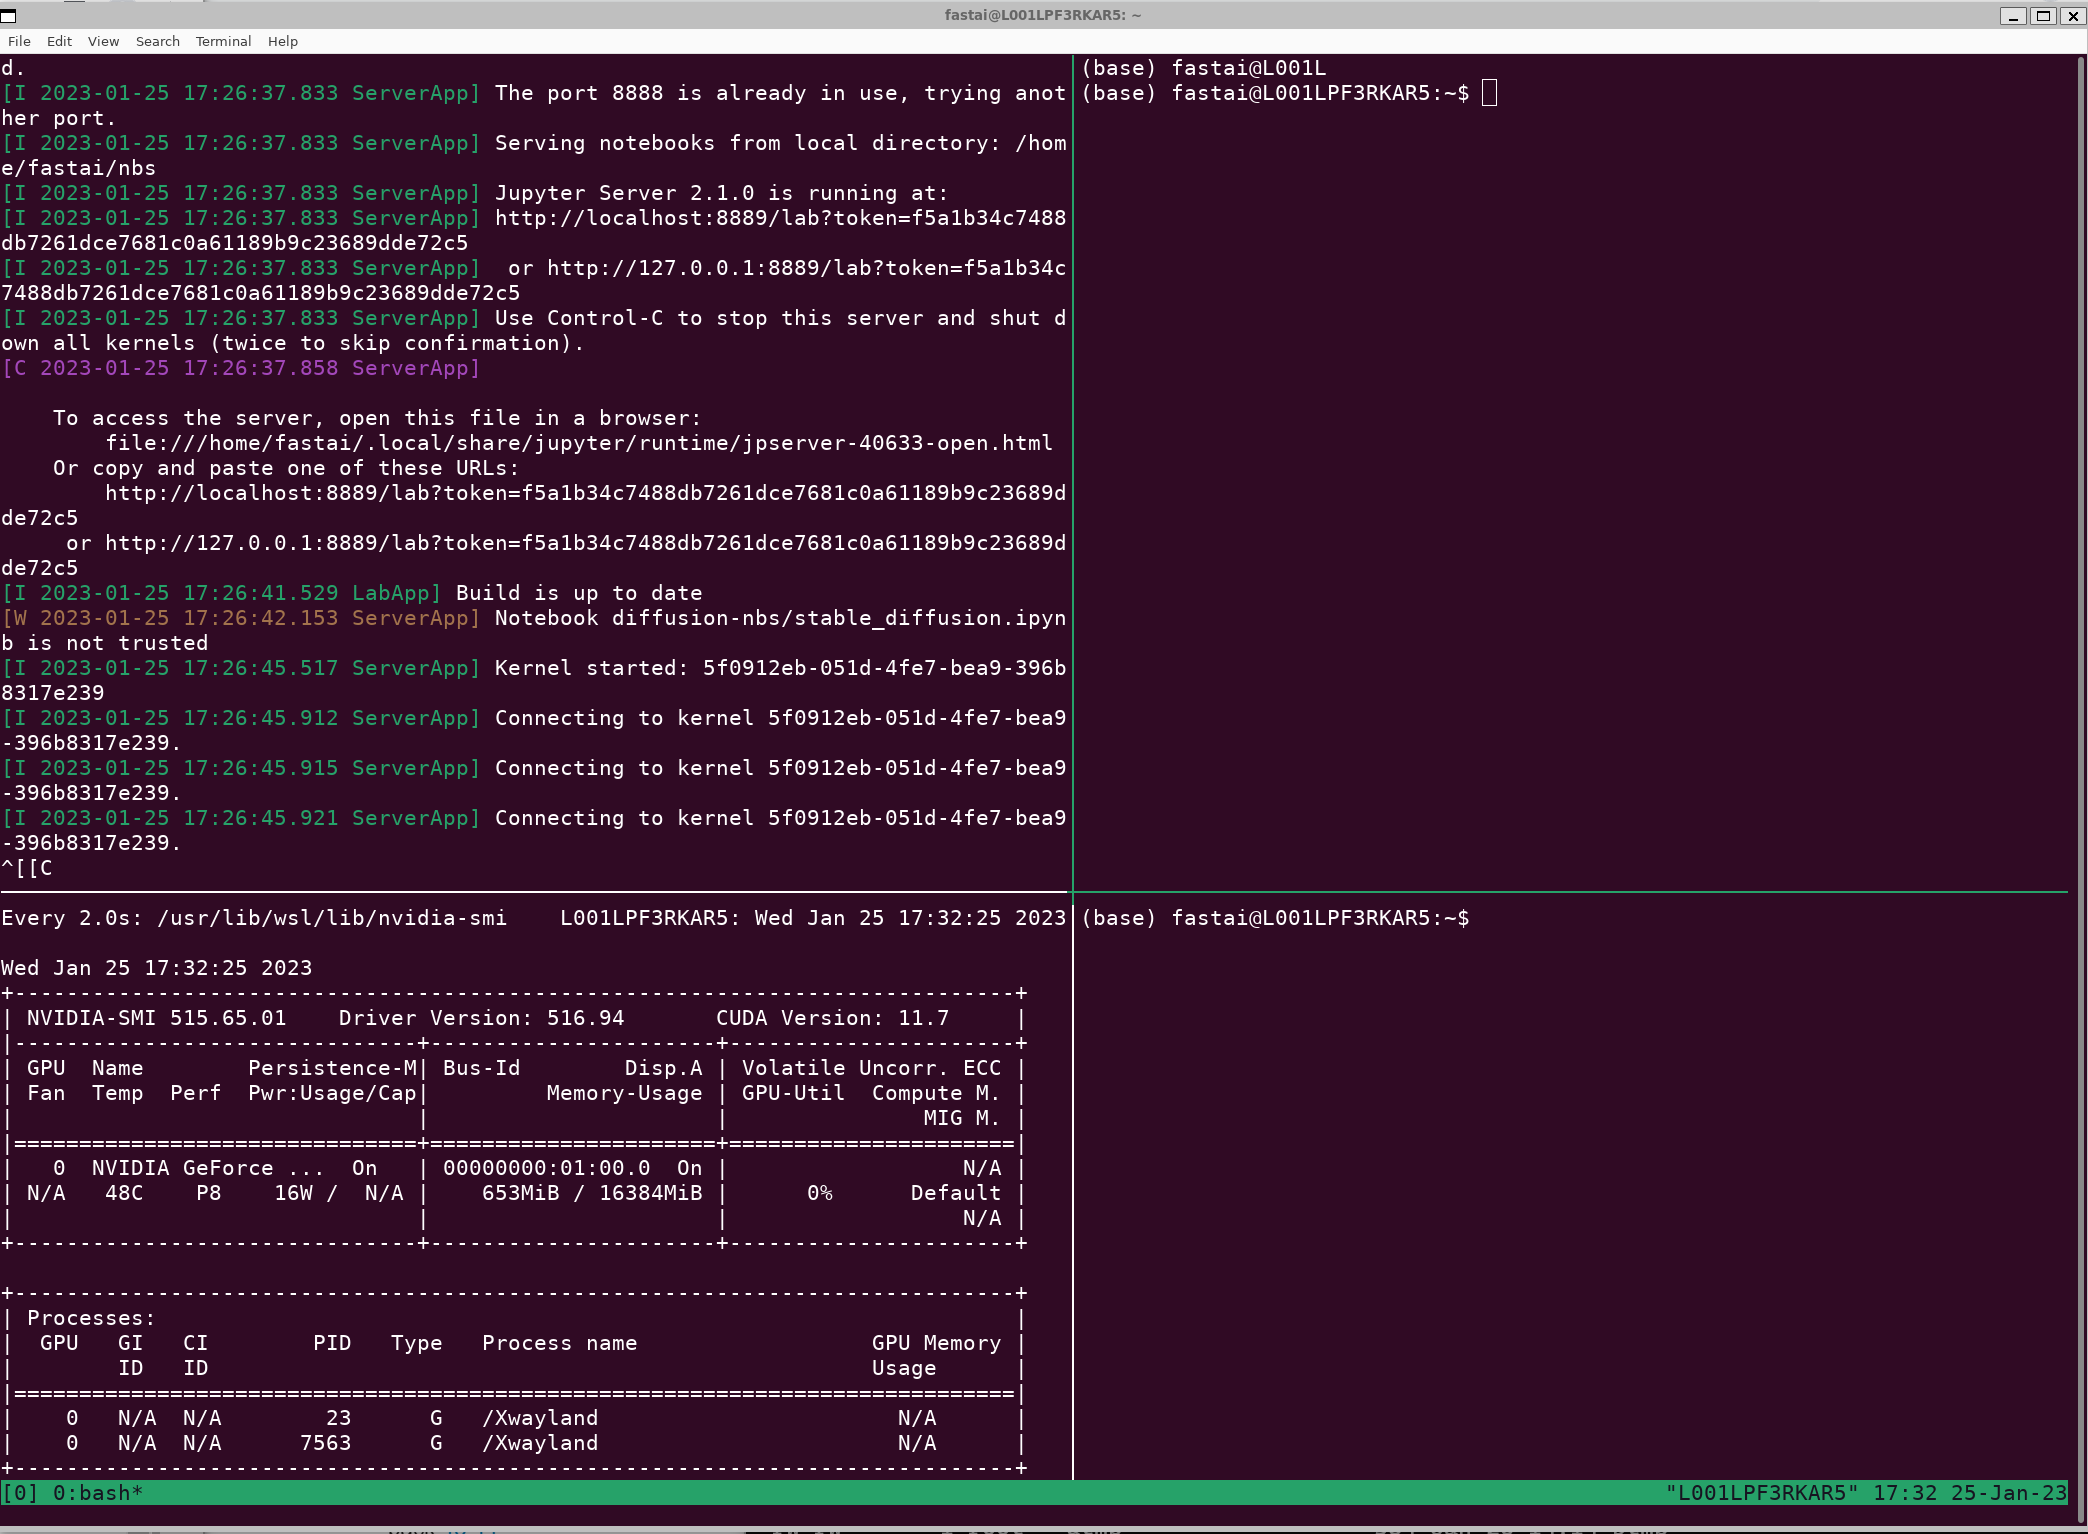



## jupyter shortcuts

in command mode

`1` - for titles # (if in code, it auto switches to markdown)

`2` - for titles ##

`3` - for titles ###

`y` to switch to code cells (much used to `m` for markdown)

## install fastai

from https://docs.fast.ai/

`mamba install -c fastchan fastai`

## run fastbook notebooks

And to run notebooks from fastbook, we have to install `fastbook` and `sentencepiece` as well

### untar_data issues

`path = untar_data(URLs.MNIST_SAMPLE)` fails with 
> `[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:997)`

not exactly why because my certifi/certs are updated with my corporate CA

And if I workaround with this preceeding

```python
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
```

I have another error which is `MICHELIN GROUP - Internet Access blocked</h1><br>Access denied. You are attempting to access the Internet using an obsolete version of Chrome.`

Looking in fastai code, I see something like https://github.com/fastai/fastai2/blob/master/fastai2/data/external.py#L162
`s.headers.update({'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'})`

Is it that user-agent is old and considered as dangerous by security agent in my company?


## End of session - wrap-up

Should defintely solve the issue with untar_data

And at the end of this session, my base environment has been built this way

```bash
pip install -U certifi
export SSL_CERT_FILE=`python -c 'import certifi;print(certifi.where())'`
# update CA
export TMPDIR=`mktemp -d`
git clone git@gitlab.michelin.com:DEV/bib-certificates.git $TMPDIR
cd $TMPDIR
cat *trust-ca.pem >> $SSL_CERT_FILE
cd

mamba install ipython

mamba install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

mamba install jupyterlab ipywidgets

mamba install -c fastchan fastai fastbook sentencepiece
```


# Live coding 3

- [Live-coding 3 - forum entry](https://forums.fast.ai/t/live-coding-3/96707)
- [Live-coding 3 - video](https://www.youtube.com/watch?v=B6BQiIgiEks)

From previous session, question from audience about why Jeremy discourages to use multiple mamba environnement. Quite interesting.

## paperspace gradient notebooks

I use github to sign-up on paperspace. And create a project, then a notebook (actually a server?) 

https://console.paperspace.com/teox6gpp0/projects/pa3mp7r16wz/notebooks

## graphical debugger in jupyter lab

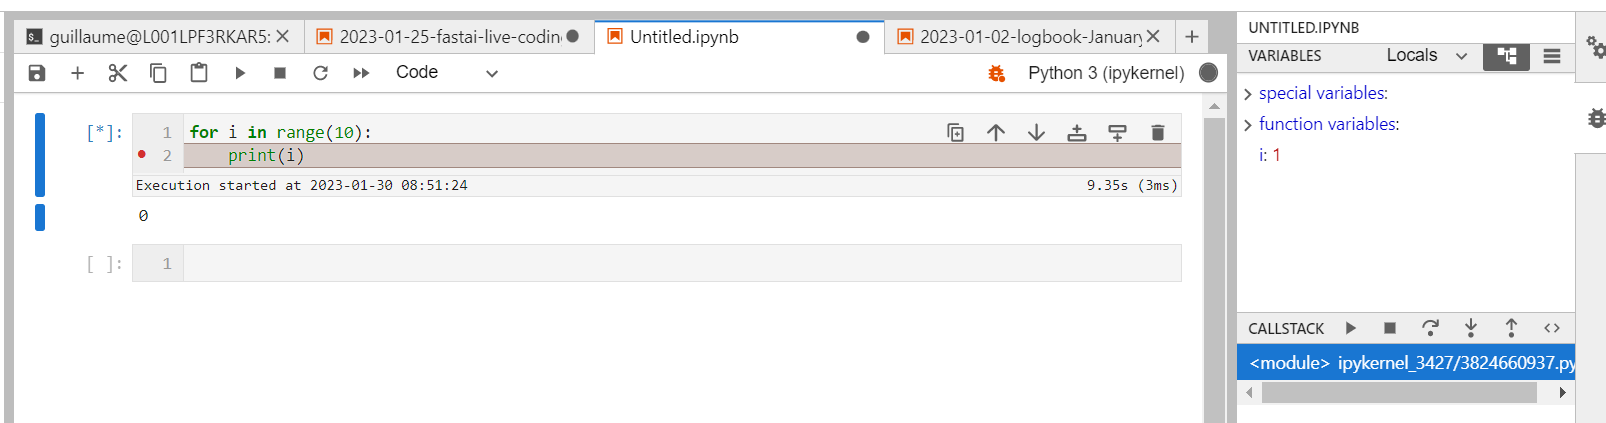

one can see the limit of `from xxx import *`, you will have the full variables in this window.

## classic, non-graphical debugger

Just by adding `%%debug`

and for a reason it works better when you navigate into a function

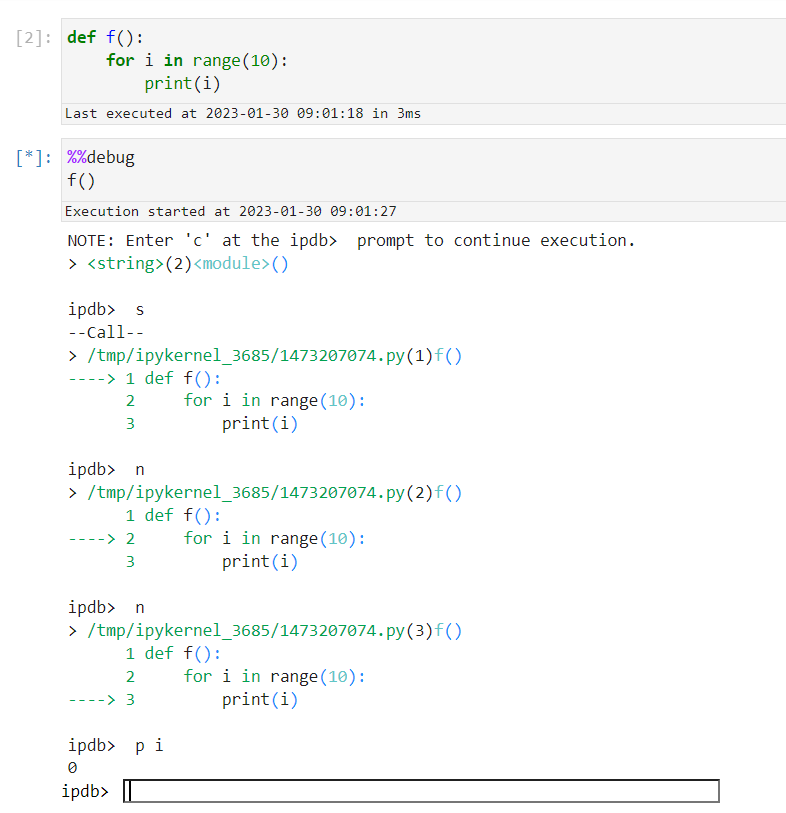

And have access to classic `ipdb` options

`h`for help

`c` for continue

`n` for next

`p` for print

`s`for step into

`q`for quit

or a second way:

In [2]:
from pdb import set_trace

def f():
    for i in range(3):
        set_trace()
        print(i)

In [3]:
f()

> /tmp/ipykernel_1682/972468431.py(6)f()
      2 
      3 def f():
      4     for i in range(3):
      5         set_trace()
----> 6         print(i)



ipdb>  p i


0


ipdb>  q


## persistent storage in paperspace

`/storage` is following you on all your servers.

To keep a consistent environment each time you start a paperspace server, Jeremy is following this process:

- install additional lib with `pip --user`. e.g. `pip install -U fastcore --user`. It will install libs in `~/.local`

- move `.local` to `/storage`: `mv ~/.local /storage`

- symbolic link back from /storage/.local to ~/.local: `ln -s /storage/.local ~/`


This has to be done once.

And because paperspace has this nifty thing to call `/storage/.bash.local` at the start of a session, you can automate things here.


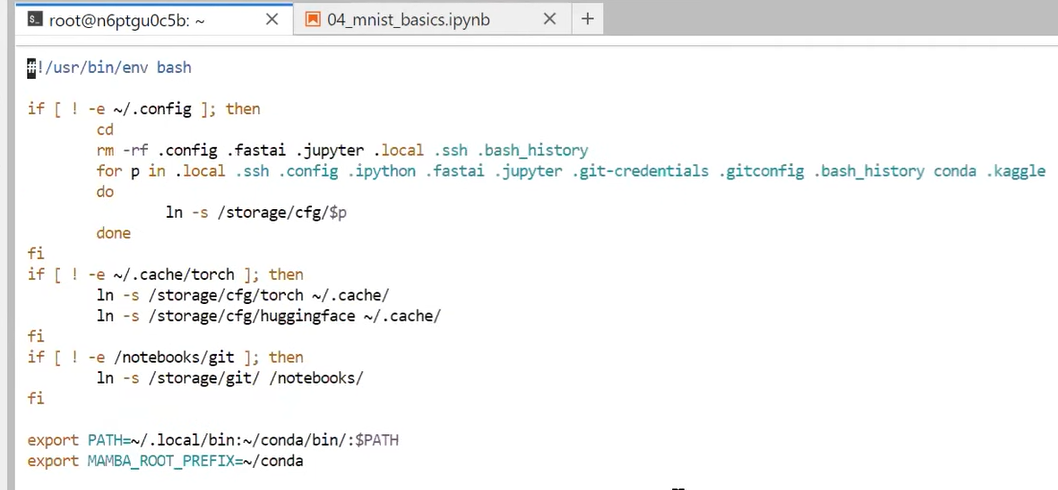

Actually it may be smarter to include this into `/storage/pre-run.sh` and not `/storage/.bash.local`. First one is run once at the start of your server. The last one is run each time you open a terminal

## sys.path

Jeremy gets some issue because site-packages was not part of sys.path...

In [4]:
import sys

sys.path

['/mnt/c/Users/f279814/git/blog/posts',
 '/home/guillaume/miniconda/envs/fastai/lib/python310.zip',
 '/home/guillaume/miniconda/envs/fastai/lib/python3.10',
 '/home/guillaume/miniconda/envs/fastai/lib/python3.10/lib-dynload',
 '',
 '/home/guillaume/miniconda/envs/fastai/lib/python3.10/site-packages']